In [23]:
import matplotlib.pyplot as plt

## Opening the File

In [24]:
geneSequenceFilePointer=open("resources/gene_sequence.txt")

### Specs:
> * Window_size : 1000
> * Nucleotide 1 : g
> * Nucleotide 2 : c
> * Skew = (nucleotide1 - nucleotide2) / (nucleotide1 + nucleotide2)

In [25]:
window_size=1000
step_size=100
nucleotide_1="g"
nucleotide_2="c"

### The Skew Function

In [26]:
def calculate_skew(n1,n2):
    return (n1-n2)/(n1+n2)     

### The Counting Function:

In [27]:
def count_nucleotides(n,sequence):
    if (n==1):
        return sequence.count(nucleotide_1)
    elif (n==2):
        return sequence.count(nucleotide_2)
    else : 
        return -1

### Creating the list of skew values:

In [28]:
skew_values_list=[]
cummulative_values=[0]
i=0
while (1):
    read_sequence=geneSequenceFilePointer.read(window_size)
    if(read_sequence==''):
        break
    n1=count_nucleotides(1,read_sequence)
    n2=count_nucleotides(2,read_sequence)
    skew=calculate_skew(n1,n2)
    skew_values_list.append(skew)
    i=i+1
    if(i%step_size==0 and i!=0):
        cummulative_values.append(cummulative_values[-1]+sum(skew_values_list))
        skew_values_list=[]
        

### Closing the File Pointer

In [31]:
geneSequenceFilePointer.close()

### Plotting the GC Skew Plot

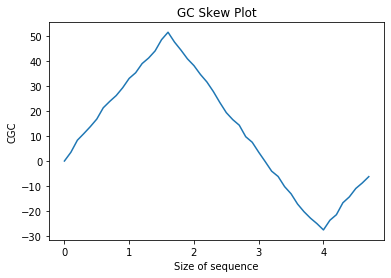

In [30]:
x=[float(i/10) for i in range(len(cummulative_values))]

plt.plot(x,cummulative_values)

plt.xlabel('Size of sequence')
plt.ylabel('CGC')

plt.title('GC Skew Plot')

plt.show()